In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [89]:
path_x = 'C:\\Users\\LENOVO\\Desktop\\juniroc\\python\\training\\2nd_assignment\\target\\features.csv'
path_y = 'C:\\Users\\LENOVO\\Desktop\\juniroc\\python\\training\\2nd_assignment\\target\\result.csv'

In [90]:
y = pd.read_csv(path_y)

In [91]:
y = y[['ID','STATUS']]

In [92]:
y['STATUS'][(y['STATUS'] == 'C') | (y['STATUS'] == '0')] = 0
y['STATUS'][(y['STATUS'] == 'X')  | (y['STATUS'] == '1') | (y['STATUS'] == '2') | (y['STATUS'] == '3') | (y['STATUS'] == '4') | (y['STATUS'] == '5')] = 1

In [93]:
y = y.groupby('ID').sum()/y.groupby('ID').count()
y

,STATUS
ID,
5001711,0.25
5001712,0.00
5001713,1.00
5001714,1.00
5001715,1.00
...,...
5150482,0.00
5150483,1.00
5150484,0.00


In [94]:
y['ID'] = y.index
y.reset_index(drop=True, inplace=True)

In [95]:
for i in range(len(y)):
    if y['STATUS'][i] < 0.5:
        y['STATUS'][i] = 0
    else:
        y['STATUS'][i] = 1

In [96]:
y = y[['ID','STATUS']]
y

,ID,STATUS
0,5001711,0.0
1,5001712,0.0
2,5001713,1.0
3,5001714,1.0
4,5001715,1.0
...,...,...
45980,5150482,0.0
45981,5150483,1.0
45982,5150484,0.0
45983,5150485,0.0


In [97]:
x = pd.read_csv(path_x)

In [144]:
data = pd.merge(x, y, on='ID')
data_2 = pd.merge(x, y, on='ID')

In [12]:
for i in range(len(data)):
    if data['DAYS_EMPLOYED'][i] > 0 :
        data['DAYS_EMPLOYED'][i] = 0

# DAYS_EMPLOYED를 YEAR_EMPLOYED(근속연수)로 바꾸기

# path_x_1 = path_x.copy()
data['DAYS_EMPLOYED'] = -(data['DAYS_EMPLOYED'])//365
data.rename(columns = {'DAYS_EMPLOYED' : 'YEARS_EMPLOYED'}, inplace = True)

                     
data["DAYS_BIRTH"] = -(data["DAYS_BIRTH"])//365
data.rename(columns = {'DAYS_BIRTH' : 'AGE'}, inplace = True)

# 같은 숫자를 가지는 컬럼 제거 
data.drop(columns=['FLAG_MOBIL','OCCUPATION_TYPE'],inplace= True)

In [13]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,2.0,0.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,2.0,0.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58,3,0,0,0,2.0,1.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,0,1,1,1.0,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,0,1,1,1.0,1.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  AGE                  36457 non-null  int64  
 11  YEARS_EMPLOYED       36457 non-null  int64  
 12  FLAG_WORK_PHONE      36457 non-null  int64  
 13  FLAG_PHONE           36457 non-null  int64  
 14  FLAG_EMAIL           36457 non-null  int64  
 15  CNT_FAM_MEMBERS      36457 non-null 

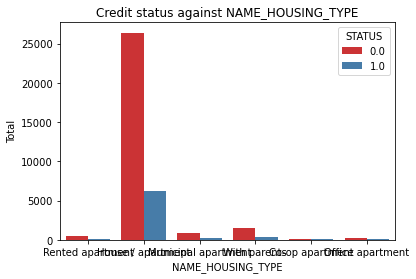

In [15]:
#fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = 'NAME_HOUSING_TYPE', hue = 'STATUS', palette = 'Set1', data = data)
ax.set(title = 'Credit status against NAME_HOUSING_TYPE', 
       xlabel = 'NAME_HOUSING_TYPE', ylabel = 'Total')
plt.show()

In [16]:
new_1 = data[['NAME_HOUSING_TYPE','STATUS']]

In [17]:
new_1

,NAME_HOUSING_TYPE,STATUS
0,Rented apartment,0.0
1,Rented apartment,0.0
2,House / apartment,1.0
3,House / apartment,1.0
4,House / apartment,1.0
...,...,...
36452,House / apartment,1.0
36453,House / apartment,1.0
36454,House / apartment,1.0
36455,House / apartment,0.0


In [18]:
new_1 = data[['NAME_HOUSING_TYPE','STATUS']]
new_1 = new_1.groupby('NAME_HOUSING_TYPE').sum()/new_1.groupby('NAME_HOUSING_TYPE').count()
new_1['NAME_HOUSING_TYPE'] = new_1.index
new_1.reset_index(drop=True, inplace=True)
new_1 = new_1[['NAME_HOUSING_TYPE','STATUS']]

In [19]:
new_1

,NAME_HOUSING_TYPE,STATUS
0,Co-op apartment,0.392857
1,House / apartment,0.189843
2,Municipal apartment,0.213652
3,Office apartment,0.209924
4,Rented apartment,0.212174
5,With parents,0.181869


In [20]:
for i in range(len(data)):
    for j in range(6):
        if data['NAME_HOUSING_TYPE'][i] == new_1['NAME_HOUSING_TYPE'][j]:
            data['NAME_HOUSING_TYPE'][i] = new_1['STATUS'][j]

In [21]:
# 성별 남= 0 , 여 = 1
data['CODE_GENDER'][data['CODE_GENDER'] == 'M'] = 0
data['CODE_GENDER'][data['CODE_GENDER'] == 'F'] = 1

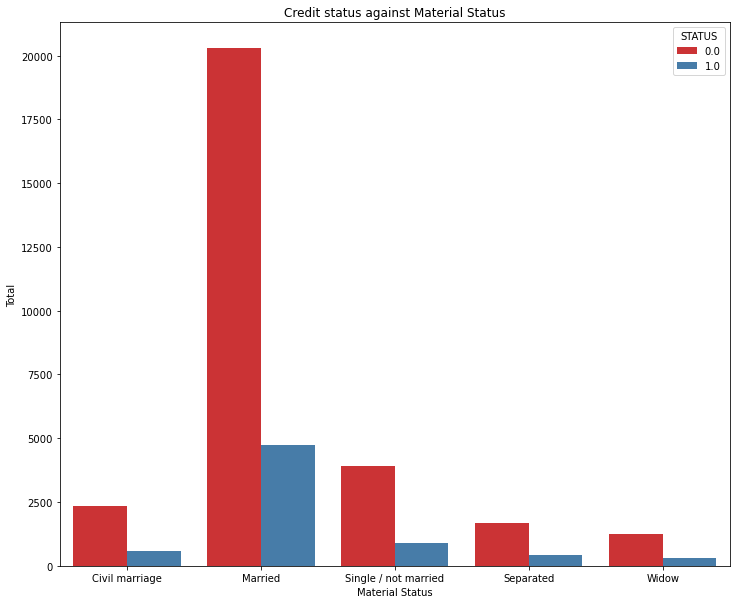

In [155]:
fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = 'NAME_FAMILY_STATUS', hue = 'STATUS', palette = 'Set1', data = data)
ax.set(title = 'Credit status against Material Status', 
       xlabel = 'Material Status', ylabel = 'Total')
plt.show()

In [23]:
new_3 = data[['NAME_FAMILY_STATUS','STATUS']]
new_3 = new_3.groupby('NAME_FAMILY_STATUS').sum()/new_3.groupby('NAME_FAMILY_STATUS').count()
new_3['NAME_FAMILY_STATUS'] = new_3.index
new_3.reset_index(drop=True, inplace=True)
new_3 = new_3[['NAME_FAMILY_STATUS','STATUS']]
new_3

,NAME_FAMILY_STATUS,STATUS
0,Civil marriage,0.198302
1,Married,0.189796
2,Separated,0.209700
3,Single / not married,0.188238
4,Widow,0.194517


In [24]:
for i in range(len(data)):
    for j in range(5):
        if data['NAME_FAMILY_STATUS'][i] == new_3['NAME_FAMILY_STATUS'][j]:
            data['NAME_FAMILY_STATUS'][i] = new_3['STATUS'][j]

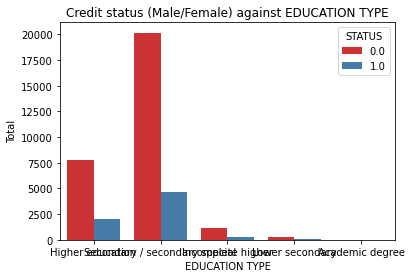

In [25]:
#fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'STATUS', palette = 'Set1', data = data)
ax.set(title = 'Credit status (Male/Female) against EDUCATION TYPE', 
       xlabel = 'EDUCATION TYPE', ylabel = 'Total')
plt.show()

In [26]:
new_2 = data[['NAME_EDUCATION_TYPE','STATUS']]
new_2 = new_2.groupby('NAME_EDUCATION_TYPE').sum()/new_2.groupby('NAME_EDUCATION_TYPE').count()
new_2['NAME_EDUCATION_TYPE'] = new_2.index
new_2.reset_index(drop=True, inplace=True)
new_2 = new_2[['NAME_EDUCATION_TYPE','STATUS']]

new_2

,NAME_EDUCATION_TYPE,STATUS
0,Academic degree,0.156250
1,Higher education,0.208840
2,Incomplete higher,0.170213
3,Lower secondary,0.168449
4,Secondary / secondary special,0.186383


In [27]:
for i in range(len(data)):
    for j in range(5):
        if data['NAME_EDUCATION_TYPE'][i] == new_2['NAME_EDUCATION_TYPE'][j]:
            data['NAME_EDUCATION_TYPE'][i] = new_2['STATUS'][j]

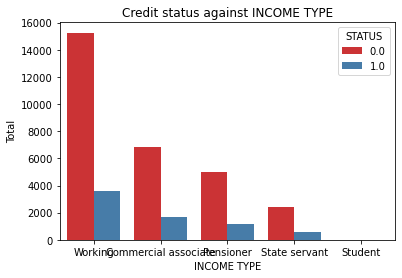

In [28]:
#fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'STATUS', palette = 'Set1', data = data)
ax.set(title = 'Credit status against INCOME TYPE', 
       xlabel = 'INCOME TYPE', ylabel = 'Total')
plt.show()

In [29]:
new_5 = data[['NAME_INCOME_TYPE','STATUS']]
new_5 = new_5.groupby('NAME_INCOME_TYPE').sum()/new_5.groupby('NAME_INCOME_TYPE').count()
new_5['NAME_INCOME_TYPE'] = new_5.index
new_5.reset_index(drop=True, inplace=True)
new_5 = new_5[['NAME_INCOME_TYPE','STATUS']]

new_5

,NAME_INCOME_TYPE,STATUS
0,Commercial associate,0.196820
1,Pensioner,0.186606
2,State servant,0.202010
3,Student,0.090909
4,Working,0.189330


In [30]:
for i in range(len(data)):
    for j in range(5):
        if data['NAME_INCOME_TYPE'][i] == new_5['NAME_INCOME_TYPE'][j]:
            data['NAME_INCOME_TYPE'][i] = new_5['STATUS'][j]
            
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,0,Y,Y,0,427500.0,0.18933,0.20884,0.198302,0.212174,32,12,1,0,0,2.0,0.0
1,5008805,0,Y,Y,0,427500.0,0.18933,0.20884,0.198302,0.212174,32,12,1,0,0,2.0,0.0
2,5008806,0,Y,Y,0,112500.0,0.18933,0.186383,0.189796,0.189843,58,3,0,0,0,2.0,1.0
3,5008808,1,N,Y,0,270000.0,0.19682,0.186383,0.188238,0.189843,52,8,0,1,1,1.0,1.0
4,5008809,1,N,Y,0,270000.0,0.19682,0.186383,0.188238,0.189843,52,8,0,1,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,Y,Y,0,315000.0,0.18933,0.186383,0.189796,0.189843,47,6,0,0,0,2.0,1.0
36453,5149834,1,N,Y,0,157500.0,0.19682,0.20884,0.189796,0.189843,33,3,0,1,1,2.0,1.0
36454,5149838,1,N,Y,0,157500.0,0.186606,0.20884,0.189796,0.189843,33,3,0,1,1,2.0,1.0
36455,5150049,1,N,Y,0,283500.0,0.18933,0.186383,0.189796,0.189843,49,1,0,0,0,2.0,0.0


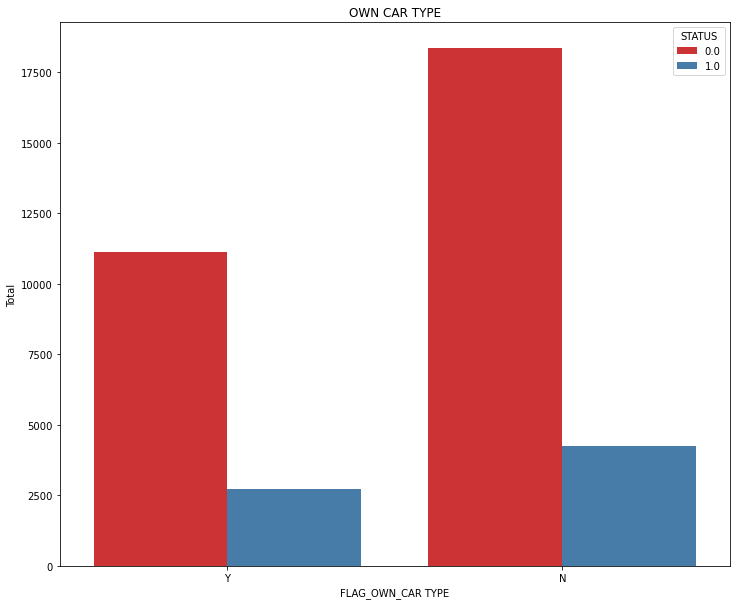

In [31]:

fig, ax = plt.subplots(1,1, figsize = (12,10))

ax = sns.countplot(x = 'FLAG_OWN_CAR', hue = 'STATUS', palette = 'Set1', data = data)
ax.set(title = 'OWN CAR TYPE',
xlabel = 'FLAG_OWN_CAR TYPE', ylabel = 'Total')
plt.show()

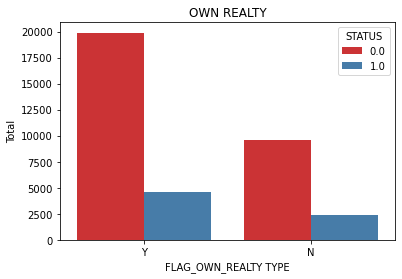

In [32]:
# fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = 'FLAG_OWN_REALTY', hue = 'STATUS', palette = 'Set1', data = data)
ax.set(title = 'OWN REALTY', 
       xlabel = 'FLAG_OWN_REALTY TYPE', ylabel = 'Total')
plt.show()

In [33]:
# Car
data['FLAG_OWN_CAR'][data['FLAG_OWN_CAR'] == 'N'] = 0
data['FLAG_OWN_CAR'][data['FLAG_OWN_CAR'] == 'Y'] = 1

In [34]:
# Realty
data['FLAG_OWN_REALTY'][data['FLAG_OWN_REALTY'] == 'N'] = 0
data['FLAG_OWN_REALTY'][data['FLAG_OWN_REALTY'] == 'Y'] = 1

### 이상치 제거

In [35]:
# 이상치 제거

Q1 = data['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = data['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1


mini = Q1-1.5*IQR
maxi = Q3+1.5*IQR
data = data[(data['AMT_INCOME_TOTAL'] >= mini) & (data['AMT_INCOME_TOTAL'] <= maxi)]

data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
2,5008806,0,1,1,0,112500.0,0.18933,0.186383,0.189796,0.189843,58,3,0,0,0,2.0,1.0
3,5008808,1,0,1,0,270000.0,0.19682,0.186383,0.188238,0.189843,52,8,0,1,1,1.0,1.0
4,5008809,1,0,1,0,270000.0,0.19682,0.186383,0.188238,0.189843,52,8,0,1,1,1.0,1.0
5,5008810,1,0,1,0,270000.0,0.19682,0.186383,0.188238,0.189843,52,8,0,1,1,1.0,0.0
6,5008811,1,0,1,0,270000.0,0.19682,0.186383,0.188238,0.189843,52,8,0,1,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,1,1,0,315000.0,0.18933,0.186383,0.189796,0.189843,47,6,0,0,0,2.0,1.0
36453,5149834,1,0,1,0,157500.0,0.19682,0.20884,0.189796,0.189843,33,3,0,1,1,2.0,1.0
36454,5149838,1,0,1,0,157500.0,0.186606,0.20884,0.189796,0.189843,33,3,0,1,1,2.0,1.0
36455,5150049,1,0,1,0,283500.0,0.18933,0.186383,0.189796,0.189843,49,1,0,0,0,2.0,0.0


### Scaling

In [36]:
features = data[data.columns[1:-1]]
target = data[data.columns[-1]]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features)
# 0 ~ 1 Scaling 
scaler = MinMaxScaler(feature_range=(0, 1))


features[features.columns] = scaler.fit_transform(features[features.columns])

In [37]:
features

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
2,0.0,1.0,1.0,0.0,0.243590,0.885869,0.572968,0.072585,0.037790,0.791667,0.069767,0.0,0.0,0.0,0.052632
3,1.0,0.0,1.0,0.0,0.692308,0.953283,0.572968,0.000000,0.037790,0.666667,0.186047,0.0,1.0,1.0,0.000000
4,1.0,0.0,1.0,0.0,0.692308,0.953283,0.572968,0.000000,0.037790,0.666667,0.186047,0.0,1.0,1.0,0.000000
5,1.0,0.0,1.0,0.0,0.692308,0.953283,0.572968,0.000000,0.037790,0.666667,0.186047,0.0,1.0,1.0,0.000000
6,1.0,0.0,1.0,0.0,0.692308,0.953283,0.572968,0.000000,0.037790,0.666667,0.186047,0.0,1.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,0.0,1.0,1.0,0.0,0.820513,0.885869,0.572968,0.072585,0.037790,0.562500,0.139535,0.0,0.0,0.0,0.052632
36453,1.0,0.0,1.0,0.0,0.371795,0.953283,1.000000,0.072585,0.037790,0.270833,0.069767,0.0,1.0,1.0,0.052632
36454,1.0,0.0,1.0,0.0,0.371795,0.861351,1.000000,0.072585,0.037790,0.270833,0.069767,0.0,1.0,1.0,0.052632
36455,1.0,0.0,1.0,0.0,0.730769,0.885869,0.572968,0.072585,0.037790,0.604167,0.023256,0.0,0.0,0.0,0.052632


### 시각화 추가 자료

,AGE,STATUS
2,51-60,1.0
3,51-60,1.0
4,51-60,1.0
12,41-50,1.0
13,41-50,1.0
...,...,...
36437,31-40,1.0
36442,41-50,1.0
36452,41-50,1.0
36453,31-40,1.0


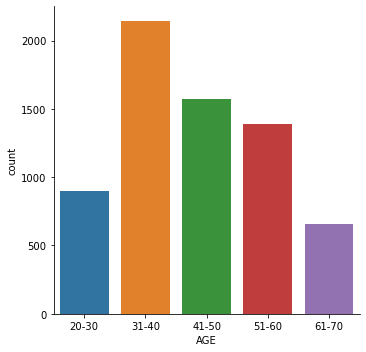

In [38]:
# 나이별 risk 인원 카운트
age_st = data[['AGE','STATUS']]
interval = (19,29,39,49,59,69)
categories = ['20-30','31-40','41-50','51-60','61-70']
age_st['AGE'] = pd.cut(age_st.AGE, interval, labels = categories)

status_one = age_st[['AGE','STATUS']][age_st['STATUS'] == 1]

sns.catplot('AGE', kind = 'count', data = status_one)
status_one

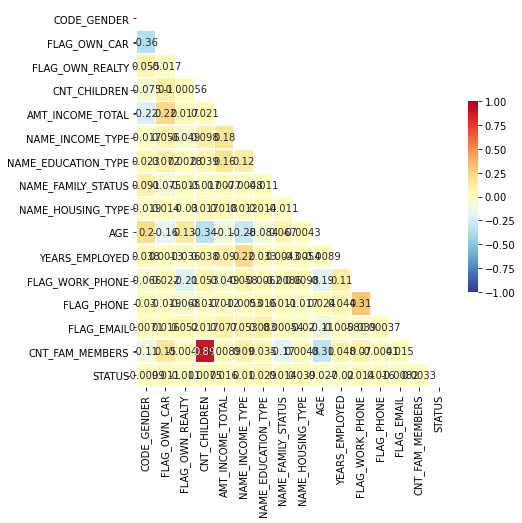

In [39]:
# 상관관계 분석

from pandas import DataFrame
from pandas import Series

data_cor = pd.concat([features, target], axis=1)

df = data_cor.corr()
fig, ax = plt.subplots( figsize=(7,7) )

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,      
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1)  
plt.show()

<AxesSubplot:>

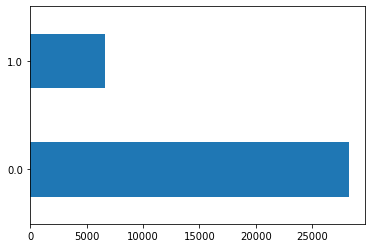

In [40]:
CountStatus = pd.value_counts(data['STATUS'].values, sort=True)
CountStatus.plot.barh()

### Logistic Regression Modeling

In [41]:
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)
clf = linear_model.LogisticRegression()
clf.fit(x_train,y_train)
clf.coef_

array([[-0.00524892, -0.0226209 , -0.02723458, -0.36391859,  0.18606639,
         0.2076037 ,  0.32957685,  0.11011351,  0.95619739, -0.31739948,
        -0.52990062,  0.05225987,  0.09906375, -0.16559562, -0.36527586]])

In [154]:
print(features.columns[8])
print(features.columns[10])

NAME_HOUSING_TYPE
YEARS_EMPLOYED


In [43]:
y_hat = clf.predict(x_test)

In [44]:
clf.score(x_test,y_test)

0.8099245250281947

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89      9336
         1.0       0.00      0.00      0.00      2191

    accuracy                           0.81     11527
   macro avg       0.40      0.50      0.45     11527
weighted avg       0.66      0.81      0.72     11527



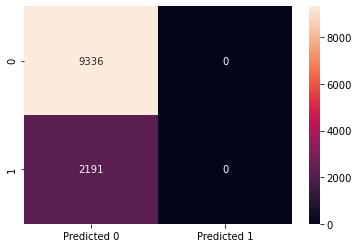

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

cm_1 = np.array(confusion_matrix(y_test, y_hat, labels=[0,1]))

confusion_clf = pd.DataFrame(cm_1, index=['0', '1'], columns=['Predicted 0', 'Predicted 1'])
confusion_clf

sns.heatmap(confusion_clf,annot=True,fmt='g')

print(classification_report(y_test, y_hat))

### Scaling 하지 않은 데이터

In [46]:
# Scaling 하지 않은 데이터
features_1 = data[data.columns[1:-1]]
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(features_1, target, test_size=0.33, random_state=42)
clf_1 = linear_model.LogisticRegression()
clf_1.fit(x_train_1,y_train_1)
clf_1.coef_

array([[-4.97981438e-04, -5.71598250e-05, -3.65529637e-04,
        -2.05393747e-04, -1.62051579e-06, -9.76293676e-05,
        -9.50296796e-05, -9.86972956e-05, -9.59736932e-05,
        -2.57828407e-02, -3.09606648e-03, -1.06436311e-04,
        -1.15943553e-04, -3.89049263e-05, -1.14958807e-03]])

### KNN Modeling

In [47]:
#kNN Classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Create standardizer
standardizer = StandardScaler()

# Standardize features
x_train_std = standardizer.fit_transform(x_train)

# Train a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
knn.fit(x_train, y_train)

y_predict_knn = knn.predict(x_test)

print(knn.score(x_test, y_test))

0.8225904398369046


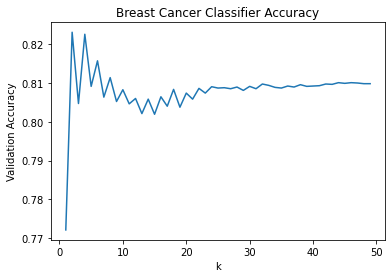

In [48]:
# k 변화에 따른 시각화
import matplotlib.pyplot as plt

k_list = range(1,50)
accuracies = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    accuracies.append(knn.score(x_test, y_test))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      9336
         1.0       0.60      0.21      0.31      2191

    accuracy                           0.82     11527
   macro avg       0.72      0.59      0.60     11527
weighted avg       0.79      0.82      0.79     11527



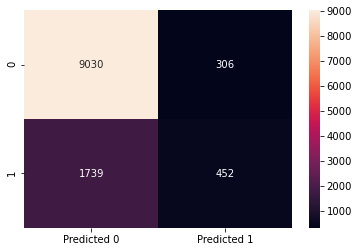

In [49]:
# kNN 성능평가
from sklearn.metrics import classification_report, confusion_matrix

cm_2 = np.array(confusion_matrix(y_test, y_predict_knn, labels=[0,1]))

confusion_knn = pd.DataFrame(cm_2, index=['0', '1'], columns=['Predicted 0', 'Predicted 1'])

sns.heatmap(confusion_knn,annot=True,fmt='g')

print(classification_report(y_test, y_predict_knn))

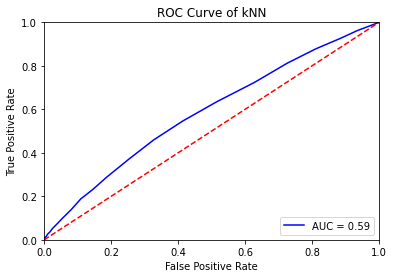

AUC : 0.5866255074021363


In [50]:
#ROC 커브
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_scores = knn.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

print('AUC : {}'.format(auc(fpr,tpr))) #AUC 값

### Decision Tree Modeling

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(
    max_depth = 5,
#     min_samples_split = 4,
#     min_samples_leaf = 4,
    random_state = 0)

dt_model = clf_dt.fit(x_train, y_train)

y_predict_dt = dt_model.predict(x_test)

dt_model.score(x_test, y_test)

In [77]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(
    max_depth = 5,
#     min_samples_split = 4,
#     min_samples_leaf = 4,
    random_state = 0)

dt_model = clf_dt.fit(x_train, y_train)

y_predict_dt = dt_model.predict(x_test)

dt_model.score(x_test, y_test)

0.8107920534397501

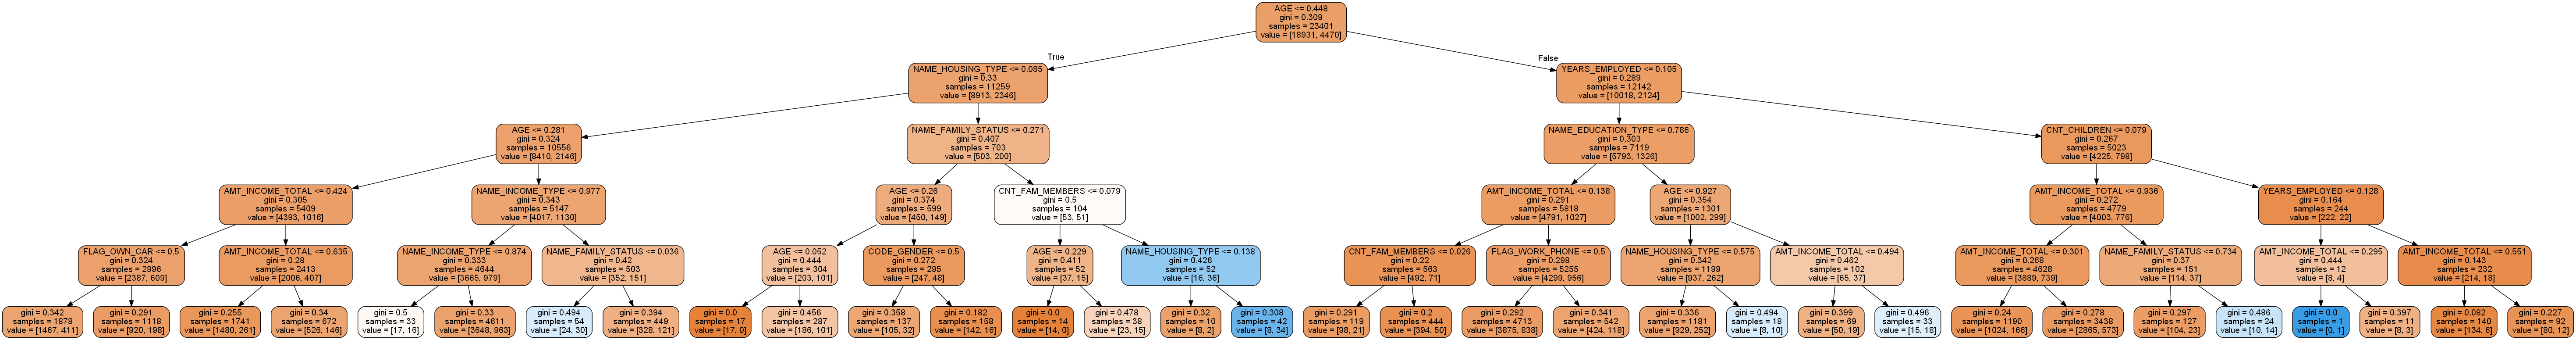

In [78]:
# Create DOT data
import pydotplus
from sklearn import datasets
from IPython.display import Image
from sklearn import tree
from sklearn.datasets import make_moons

dot_data = tree.export_graphviz(clf_dt,
                                out_file = None,
                                feature_names = features.columns,
                                rounded = True,
                                filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90      9336
         1.0       0.56      0.02      0.04      2191

    accuracy                           0.81     11527
   macro avg       0.68      0.51      0.47     11527
weighted avg       0.76      0.81      0.73     11527



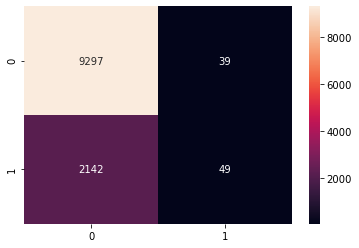

In [80]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

confusoin_dt = pd.DataFrame(confusion_matrix(y_test,y_predict_dt))

sns.heatmap(confusoin_dt,annot=True,fmt='g')

print(classification_report(y_test, y_predict_dt))

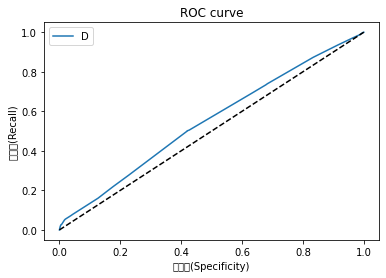

AUC : 0.5489507399007468


In [81]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

y_predict_dt = dt_model.predict_proba(x_test)

fpr, tpr, _ = roc_curve(y_test, y_predict_dt[:,1])

plt.plot(fpr, tpr)
plt.legend('D')
plt.xlabel('특이도(Specificity)')
plt.ylabel('재현율(Recall)')
plt.title('ROC 커브')
plt.plot([0,1], [0,1], 'k--', label="random guess")
plt.title('ROC curve')
plt.show()

print('AUC : {}'.format(auc(fpr,tpr))) #AUC 값

### Scaling 하지 않은 데이터

In [82]:
# Scaling 하지 않은 데이터
features_1 = data[data.columns[1:-1]]
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(features_1, target, test_size=0.33, random_state=42)
clf_1 = linear_model.LogisticRegression()
clf_1.fit(x_train_1,y_train_1)
clf_1.coef_

array([[-4.97981438e-04, -5.71598250e-05, -3.65529637e-04,
        -2.05393747e-04, -1.62051579e-06, -9.76293676e-05,
        -9.50296796e-05, -9.86972956e-05, -9.59736932e-05,
        -2.57828407e-02, -3.09606648e-03, -1.06436311e-04,
        -1.15943553e-04, -3.89049263e-05, -1.14958807e-03]])

In [86]:
from sklearn.tree import DecisionTreeClassifier

clf_dt_1 = DecisionTreeClassifier(
    max_depth = 5,
#     min_samples_split = 4,
#     min_samples_leaf = 4,
    random_state = 0)

dt_model_1 = clf_dt_1.fit(x_train_1, y_train_1)

y_predict_dt_1 = dt_model_1.predict(x_test_1)

dt_model_1.score(x_test_1, y_test_1)

0.8107920534397501

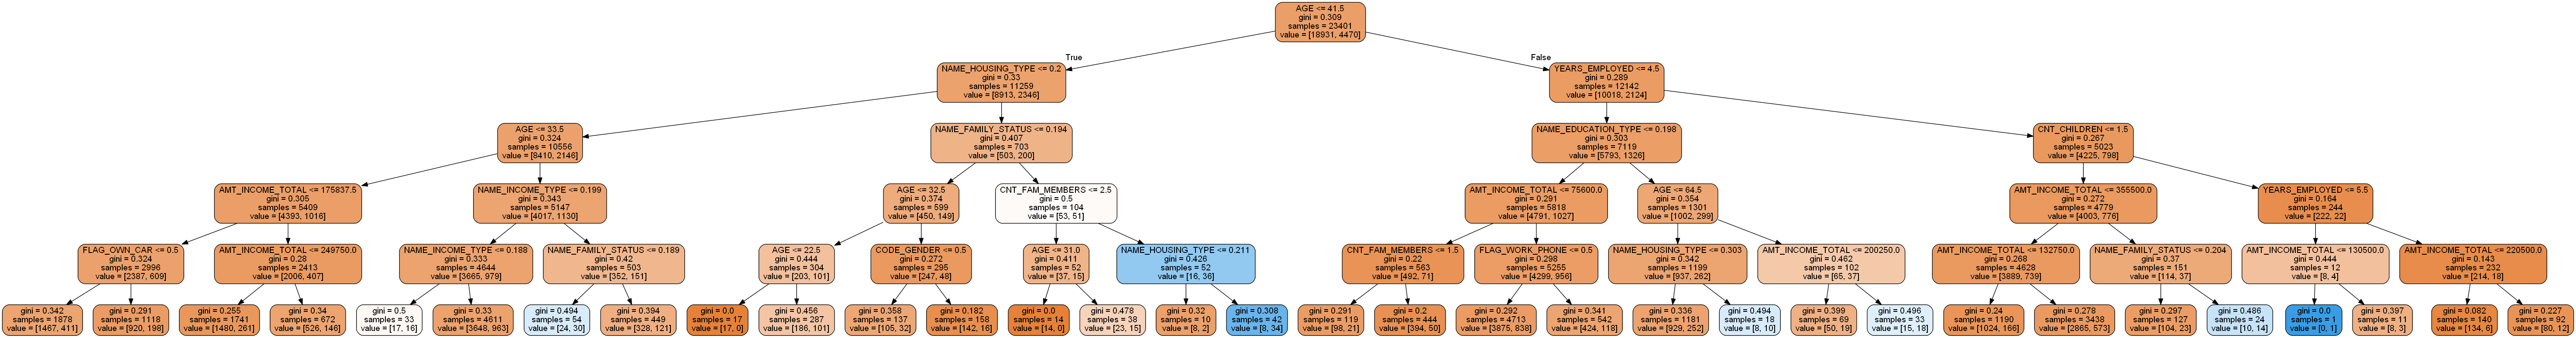

In [87]:
# Create DOT data
import pydotplus
from sklearn import datasets
from IPython.display import Image
from sklearn import tree
from sklearn.datasets import make_moons

dot_data_1 = tree.export_graphviz(clf_dt_1,
                                out_file = None,
                                feature_names = features.columns,
                                rounded = True,
                                filled = True)

# Draw graph
graph_1 = pydotplus.graph_from_dot_data(dot_data_1)

# Show graph
Image(graph_1.create_png())

### SVM Modeling

In [153]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train, y_train)
y_predict_svm = svc_model.predict(x_test)
svc_model.score(x_test,y_test)

0.8103582892339725

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90      9336
         1.0       1.00      0.00      0.00      2191

    accuracy                           0.81     11527
   macro avg       0.91      0.50      0.45     11527
weighted avg       0.85      0.81      0.73     11527



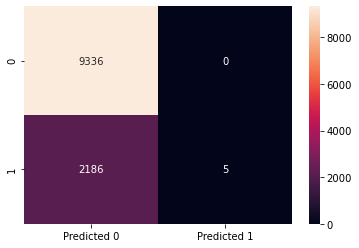

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

cm_svm = np.array(confusion_matrix(y_test, y_predict_svm, labels=[0,1]))

confusion_svm = pd.DataFrame(cm_svm, index=['0', '1'], columns=['Predicted 0', 'Predicted 1'])
sns.heatmap(confusion_svm,annot=True,fmt='g')

print(classification_report(y_test, y_predict_svm))

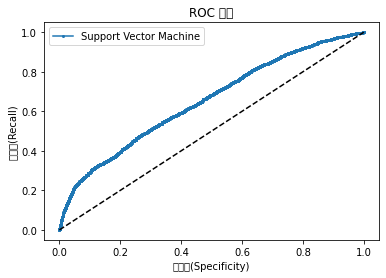

AUC : 0.654246021434015


In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_train, svc_model.decision_function(x_train))

plt.plot(fpr, tpr, 'o-', ms=2, label = "Support Vector Machine")
plt.legend()
plt.plot([0,1], [0,1], 'k--', label="random guess")
plt.xlabel('특이도(Specificity)')
plt.ylabel('재현율(Recall)')
plt.title('ROC 커브')
plt.show()

print('AUC : {}'.format(auc(fpr,tpr))) #AUC 값

### Ensemble Modeling

In [58]:
from sklearn.ensemble import VotingClassifier
knn_en = KNeighborsClassifier(n_neighbors=4)
voting_hd = VotingClassifier(estimators = [('Logistic',clf),
                                           ('Knn',knn_en),
                                           ('Decision_tree', clf_dt),
                                           ('Svm',svc_model)],
                                voting = 'hard'
                            )

voting_hd.fit(x_train, y_train)

VotingClassifier(estimators=[('Logistic', LogisticRegression()),
                             ('Knn', KNeighborsClassifier(n_neighbors=4)),
                             ('Decision_tree',
                              DecisionTreeClassifier(max_depth=4,
                                                     random_state=0)),
                             ('Svm', SVC())])

In [59]:
from sklearn.metrics import accuracy_score
for vt in (clf, knn_en, clf_dt, svc_model, voting_hd):
    vt.fit(x_train,y_train)
    y_hats = vt.predict(x_test)
    print(vt.__class__.__name__, accuracy_score(y_test, y_hats))

LogisticRegression 0.8099245250281947
KNeighborsClassifier 0.8225904398369046
DecisionTreeClassifier 0.8105317949162835
SVC 0.8103582892339725
VotingClassifier 0.8099245250281947


              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89      9336
         1.0       0.00      0.00      0.00      2191

    accuracy                           0.81     11527
   macro avg       0.40      0.50      0.45     11527
weighted avg       0.66      0.81      0.72     11527



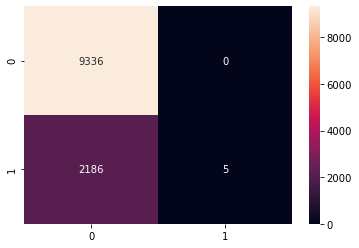

In [60]:
y_hat_vt = voting_hd.predict(x_test)

voting = np.array(confusion_matrix(y_test, y_predict_svm, labels=[0,1]))

confusion_vt = pd.DataFrame(voting, index=['0', '1'], columns=['Predicted 0', 'Predicted 1'])
sns.heatmap(voting,annot=True,fmt='g')

print(classification_report(y_test, y_hat_vt))